In [1]:
import tensorflow as tf

if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

In [2]:
print(tf.__version__)

2.0.0


# STEP 1 : Loading Data 

**The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.**

**x_train and x_test parts contain greyscale RGB codes (from 0 to 255) .**

**y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.**




In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()     

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11493376/11490434 [==============================] - 141s 12us/step


# STEP 2 : DATA PREPROCESSING

We have to scale x_train and x_test so that all values are in the [0, 1] interval. **Why do we need to scale ?** goal of scaling is to speed up the algorithm's computation . It is used to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. It is also required for some algorithms to model the data correctly.





In [5]:
x_train, x_test = x_train / 255.0  ,  x_test / 255.0

# STEP 3 : BUILD NEURAL NETWORK MODEL

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# STEP 4 : COMPILATION

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# STEP 5 : TRAIN THE MODEL

In [25]:
model.fit(x_train, y_train, epochs=6)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 90s 1ms/sample - loss: 0.0675 - accuracy: 0.9787 1:31 - loss: 0.068 - ETA: 1:29 - loss: 0.0685 - accuracy: 0. - ETA: 1:30 - loss: 0.0688  - ETA:  - ETA: 1:25 - loss: - - ETA: 1:17 - loss: 0.0629 - accuracy: 0.98 - - ETA: 1:15 - loss: 0.0623 - ac - ETA: 1:15 - loss: 0.0610  - ETA: 1:14 - loss: 0.0610 - accu - ETA: 1:13 - loss: 0.060 - ETA: 1:14 - l - ETA: 1:11 - loss: 0.0615 - accuracy: 0. - ETA: 1:11 - loss: 0.061 - ETA: 1:11 - loss: 0.0626 - accuracy: 0. - ETA: 1:11 - loss: 0.0628 - accura - ETA: 1:10 - loss: 0.0623 - accuracy:  - ETA: 1:10 - loss: 0.0627 - accuracy:  - ETA: 1:10 - loss: 0.0623 - accuracy: 0. - ETA: 1: - ETA: 1:07 - loss: 0.0617 - accura - ETA: 1:07 - loss: 0.0620 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0620 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0624 - accuracy: 0. - ETA: 1:07 - loss: - ETA: 1:05 - loss: 0.0633 - ac - ETA: 1:05 - loss: 0.0635 - accuracy:  - ETA: 1:05 - loss: 0.0637 -  - ET

60000/60000 [==============================] - 99s 2ms/sample - loss: 0.0439 - accuracy: 0.9852 1: - ETA: 1:37 - loss: 0 - ETA: 1:38 - l - ETA: 1:30 - loss: 0.0318 - accuracy: 0. - ETA: 1:29 - loss: 0.0311 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0314 - accuracy: 0. - ETA: 1:27 - loss: 0.0318 - accu - ETA: 1:22 - loss: 0 - ETA: 1:16 - loss: 0.0371 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0371 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0383 - accuracy:  - ETA: 1:14 - loss: 0.0378 - accu - ETA: 1:12 - loss: 0.0380  - ETA: 1:09 - loss: 0.0383 - accu - ETA: 1:08 - loss: 0.0381 - accuracy: 0.98 - ETA: 1: - ETA: 1:04 - loss: 0.0384 - ac - ETA: 1:05 - loss: 0.0387 -  - ETA: 1:07 - - ETA: 1:08 - l - ETA: 1:10 - loss: 0.0387 - accura - ETA: 1:11 - loss: 0.0389 - accura - ETA: 1:11 - loss: 0.0385 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0385 - accuracy - ETA: 1:11 - loss: 0.038 - ETA: 1:11 - loss: 0.0391 - accuracy - ETA: 1:11 - l - ETA: 1:11 - los - ETA - ETA: 1:10 - loss: 0.0381 - ac - ETA: 1:09 - loss:

# STEP 6 : EVALUATE THE TRAINING 

### Now let’s check that the model performs well on the test set, too:

In [23]:
evaluation = model.evaluate(x_test,  y_test, verbose=2)      

10000/1 - 3s - loss: 0.0398 - accuracy: 0.9785


In [24]:
print(evaluation[0])   #test loss
print(evaluation[1])   #test accuracy

0.07567182519305497
0.9785


# STEP 7 (optional) : PREDICTION

array([3], dtype=int64)

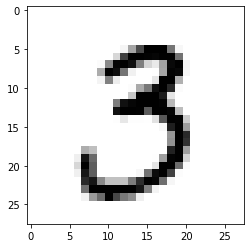

In [17]:
import matplotlib.pyplot as plt
plt.imshow(x_test[90],cmap='Greys')
model.predict_classes(x_test[90].reshape(1, 28, 28 ))


In [12]:
model.predict_classes(x_test[7].reshape(1,28,28))

array([9], dtype=int64)

In [19]:
y_test[90]

3